In [41]:
d_name = "1138_bus"
n_trials = 500

EDGE_WEIGHT = 30

In [42]:
# Standard Library
import argparse
from time import perf_counter

# Third Party Library
import matplotlib.pyplot as plt
import networkx as nx
import optuna
import pandas as pd
from egraph import Drawing, all_sources_bfs
from ex_utils.config.dataset import dataset_names
from ex_utils.config.paths import get_dataset_path
from ex_utils.config.quality_metrics import qm_names
from ex_utils.share import draw, ex_path, generate_base_df_data, rate2pivots
from ex_utils.utils.graph import (
    egraph_graph,
    load_nx_graph,
    nx_graph_preprocessing,
)
from tqdm import tqdm

In [43]:
db_uri = f"sqlite:///{ex_path.joinpath('data/optimization/optimization.db')}"
study_name = f"{d_name}_n-trials={n_trials}_sscaled-sum"
study = optuna.load_study(study_name=study_name, storage=db_uri)

486
{'params': {'pivots': 1082, 'iterations': 11, 'eps': 0.6313468811873921}, 'quality_metrics': {'angular_resolution': -1131.2843017578125, 'aspect_ratio': 0.7698809504508972, 'crossing_number': -3103.0, 'gabriel_graph_property': -245290.390625, 'ideal_edge_length': -231.21054077148438, 'neighborhood_preservation': 0.11595866829156876, 'node_resolution': -85790256.0, 'stress': -40064.328125, 'time_complexity': -27638740.76288957, 'crossing_angle': -0.47959612232617627}, 'scaled_quality_metrics': {'angular_resolution': 1.318884121205451, 'aspect_ratio': 0.13248378215317672, 'crossing_angle': 0.3372908900274562, 'crossing_number': 0.3941805826579499, 'gabriel_graph_property': 0.28271470191327697, 'ideal_edge_length': 0.3228813225261154, 'neighborhood_preservation': 1.4146699129938822, 'node_resolution': -0.08824020523073496, 'stress': 0.6408517213494376, 'time_complexity': -0.01565254206277785}}


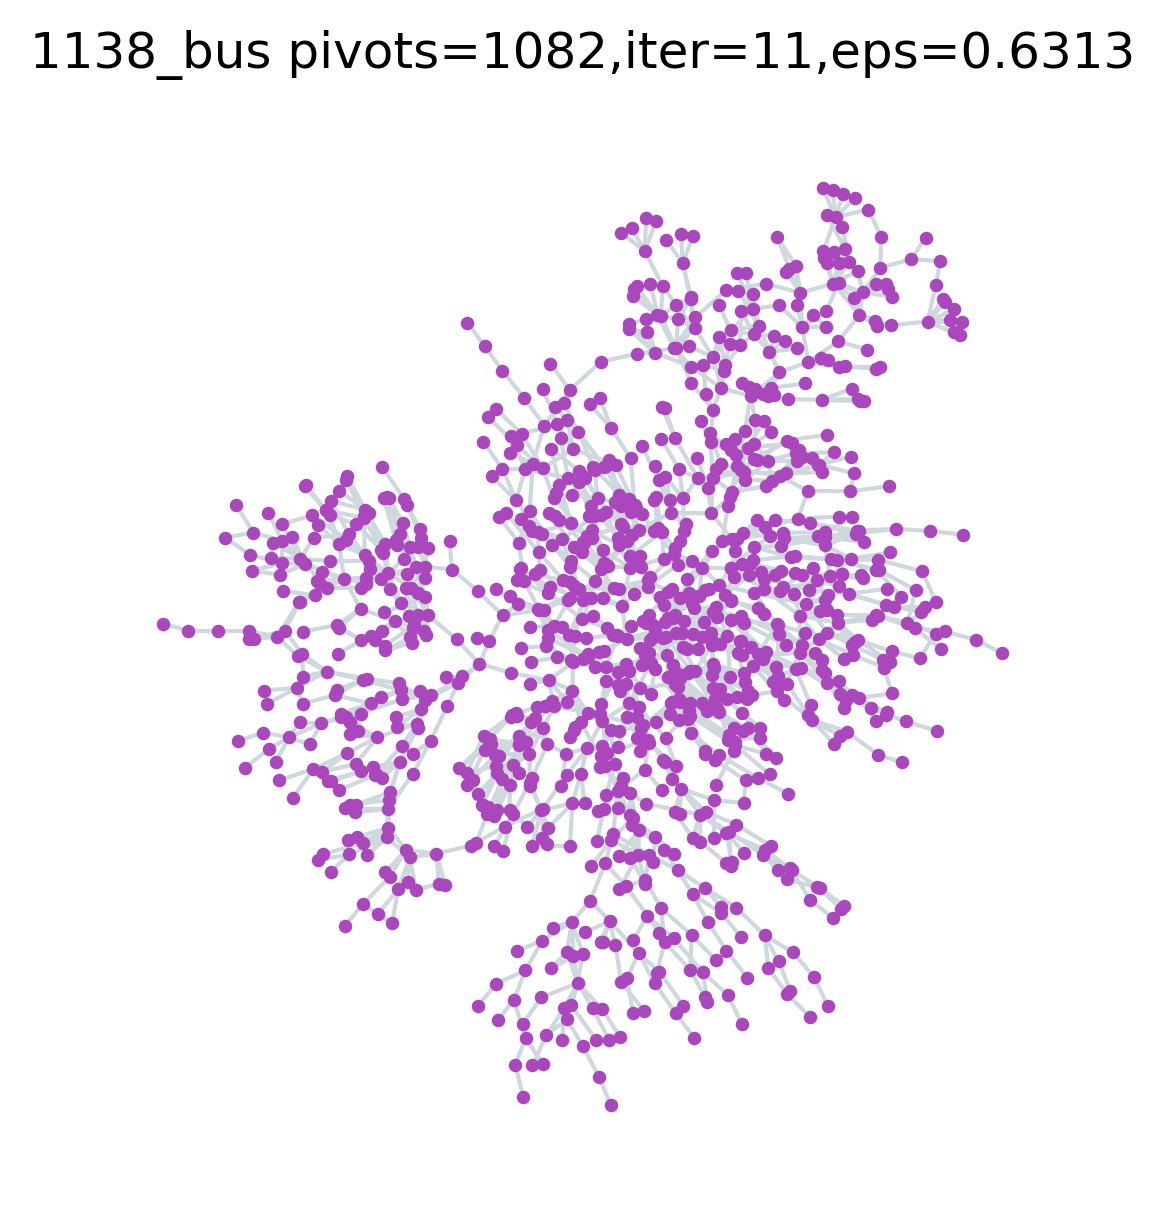

In [44]:
dataset_path = get_dataset_path(d_name)
nx_graph = nx_graph_preprocessing(
    load_nx_graph(dataset_path=dataset_path), EDGE_WEIGHT
)
n_nodes = len(nx_graph.nodes)

eg_graph, eg_indices = egraph_graph(nx_graph=nx_graph)
eg_distance_matrix = all_sources_bfs(eg_graph, EDGE_WEIGHT)

best = study.best_trial
pivots_rate = best.params["pivots_rate"]
pivots = rate2pivots(rate=pivots_rate, n_nodes=n_nodes)
iterations = best.params["iterations"]
eps = best.params["eps"]

eg_drawing = Drawing.initial_placement(eg_graph)

pos = draw(
    pivots=pivots,
    iterations=iterations,
    eps=eps,
    eg_graph=eg_graph,
    eg_indices=eg_indices,
    eg_drawing=eg_drawing,
    edge_weight=EDGE_WEIGHT,
    seed=0,
)
fig, ax = plt.subplots(dpi=300, facecolor="white")
ax.set_aspect("equal")

ax.set_title(
    f"""{d_name} pivots={pivots},iter={iterations},eps={round(eps, 4)}"""
)

print(best.number)
print(best.user_attrs)


nx.draw(
    nx_graph,
    pos=pos,
    node_size=5,
    node_color="#AB47BC",
    edge_color="#CFD8DC",
    ax=ax,
)

plt.show()